<a href="https://colab.research.google.com/github/salmaaa9/Machine-learning/blob/main/smoker_or_non_smoker_predicter_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exploratory Analysis

### Import Libraries and Dataset

In [ ]:
# Import Libraries

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
id_1 = 7344
id_2 = 7587
id_3 = 0000
random_seed = id_1+id_2+id_3
random.seed(random_seed)

In [ ]:
# Import Dataset

data_path="/content/drive/MyDrive/assignment3ml smoking/Data.csv"
output_path="/content/drive/MyDrive/assignment3ml smoking/MyData.csv"
all_data=pd.read_csv(data_path)
all_data.head()

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0   0   55         165          60       81.0             0.5   
1   1   70         165          65       89.0             0.6   
2   2   20         170          75       81.0             0.4   
3   3   35         180          95      105.0             1.5   
4   4   30         165          60       80.5             1.5   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  HDL  LDL  \
0              0.6              1               1       135  ...   40   75   
1              0.7              2               2       146  ...   57  126   
2              0.5              1               1       118  ...   45   93   
3              1.2              1               1       131  ...   38  102   
4              1.0              1               1       121  ...   44   93   

   hemoglobin  Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
0        16.5              1               1.0   22   25   27              0   
1        16.2              1               1.1   27   23   37              1   
2        17.4              1               0.8   27   31   53              0   
3        15.9              1               1.0   20   27   30              1   
4        15.4              1               0.8   19   13   17              0   

   smoking  
0        1  
1        0  
2        1  
3        0  
4        1  

[5 rows x 24 columns]

In [ ]:
# Take Sample Data

all_columns = all_data.columns.tolist()
target_column = 'smoking'
all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)
print(selected_columns)


['weight(kg)', 'Gtp', 'hemoglobin', 'serum creatinine', 'dental caries', 'LDL', 'age', 'systolic', 'id', 'eyesight(right)']


In [ ]:
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)
sample_df.head()

weight(kg)  Gtp  hemoglobin  serum creatinine  dental caries  LDL  age  \
0          60   27        16.5               1.0              0   75   55   
1          65   37        16.2               1.1              1  126   70   
2          75   53        17.4               0.8              0   93   20   
3          95   30        15.9               1.0              1  102   35   
4          60   17        15.4               0.8              0   93   30   

   systolic  id  eyesight(right)  smoking  
0       135   0              0.6        1  
1       146   1              0.7        0  
2       118   2              0.5        1  
3       131   3              1.2        0  
4       121   4              1.0        1

In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   weight(kg)        159256 non-null  int64  
 1   Gtp               159256 non-null  int64  
 2   hemoglobin        159256 non-null  float64
 3   serum creatinine  159256 non-null  float64
 4   dental caries     159256 non-null  int64  
 5   LDL               159256 non-null  int64  
 6   age               159256 non-null  int64  
 7   systolic          159256 non-null  int64  
 8   id                159256 non-null  int64  
 9   eyesight(right)   159256 non-null  float64
 10  smoking           159256 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 13.4 MB


### Train Test Split

In [ ]:
# Split the data into train, validation, and test sets
train_df, test_df = train_test_split(sample_df, test_size=0.3, random_state=random_seed)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=random_seed)

# Separate the features (X) from the target variable (y) in the training set
X_train = train_df.drop('smoking', axis=1)
y_train = train_df['smoking']

# Separate the features (X) from the target variable (y) in the test set
X_val = val_df.drop('smoking', axis=1)
y_val = val_df['smoking']

In [ ]:
train_df.shape

(111479, 11)

In [ ]:
train_df.head()

weight(kg)  Gtp  hemoglobin  serum creatinine  dental caries  LDL  \
157749          60   36        16.2               1.0              0   83   
139677          50   12        12.8               0.7              0  134   
66159           65   13        13.3               0.7              0   74   
75435           45   22        13.0               0.8              0  134   
70784           65   13        15.1               1.0              1   93   

        age  systolic      id  eyesight(right)  smoking  
157749   40       130  157749              1.2        1  
139677   40       116  139677              1.5        0  
66159    70       122   66159              0.7        0  
75435    55       101   75435              1.2        0  
70784    50       113   70784              1.2        1

48623 of 111479 passengers are smoking and it is the 43.62% of the training set.
62856 of 111479 passengers  are not smoking and it is the 56.38% of the training set.


Text(0.5, 1.05, 'Training Set Smoking Distribution')

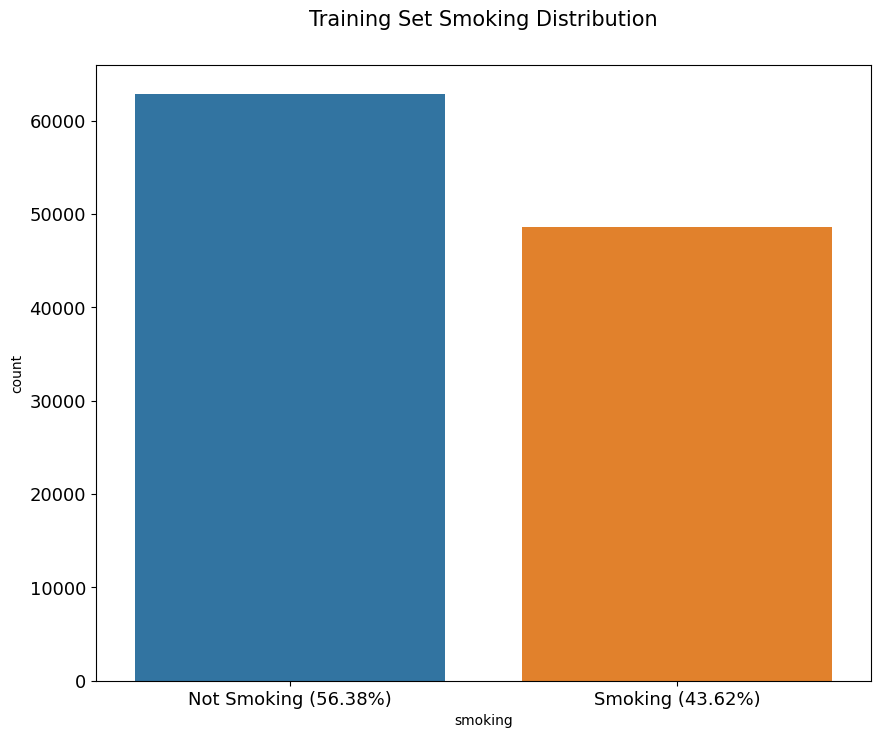

In [ ]:
smoking = train_df['smoking'].value_counts()[1]
not_smoking = train_df['smoking'].value_counts()[0]
smoking_per = smoking / train_df.shape[0] * 100
not_smoking_per = not_smoking / train_df.shape[0] * 100

print('{} of {} passengers are smoking and it is the {:.2f}% of the training set.'.format(smoking, train_df.shape[0], smoking_per))
print('{} of {} passengers  are not smoking and it is the {:.2f}% of the training set.'.format(not_smoking, train_df.shape[0], not_smoking_per))

plt.figure(figsize=(10, 8))
sns.countplot(train_df, x="smoking")
plt.xticks((0, 1), ['Not Smoking ({0:.2f}%)'.format(not_smoking_per), 'Smoking ({0:.2f}%)'.format(smoking_per)])
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Training Set Smoking Distribution', size=15, y=1.05)

In [ ]:
train_df['smoking'].describe()

count    111479.000000
mean          0.436163
std           0.495910
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: smoking, dtype: float64

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % train_df['smoking'].skew())
print("Kurtosis: %f" % train_df
      ['smoking'].kurt())

Skewness: 0.257459
Kurtosis: -1.933750


## Univariate Analysis

In [ ]:
for i in range(10):
  print(train_df.iloc[:,i].describe())

count    111479.000000
mean         67.121897
std          12.587520
min          30.000000
25%          60.000000
50%          65.000000
75%          75.000000
max         125.000000
Name: weight(kg), dtype: float64
count    111479.000000
mean         36.162766
std          31.125265
min           3.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: Gtp, dtype: float64
count    111479.000000
mean         14.792613
std           1.433603
min           4.900000
25%          13.800000
50%          15.000000
75%          15.800000
max          21.000000
Name: hemoglobin, dtype: float64
count    111479.000000
mean          0.892106
std           0.179813
min           0.100000
25%           0.800000
50%           0.900000
75%           1.000000
max           9.900000
Name: serum creatinine, dtype: float64
count    111479.000000
mean          0.197831
std           0.398366
min           0.000000
25%           0.000000
50%           0.00

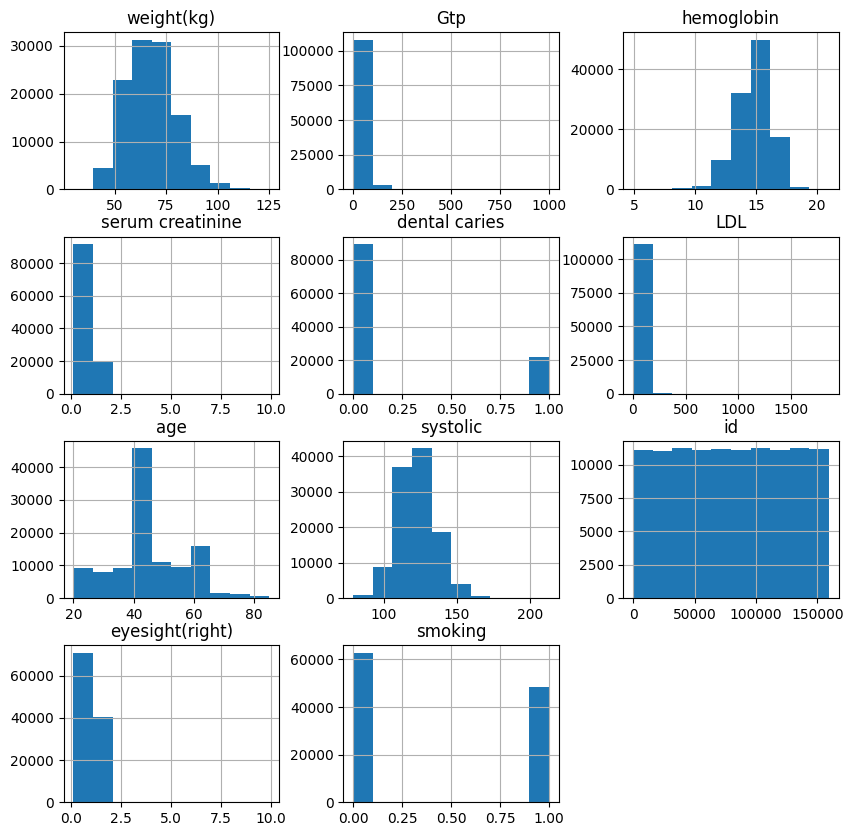

In [ ]:
# Histogram
train_df.hist(figsize=(10, 10))
plt.show()

## Bivariate Analysis

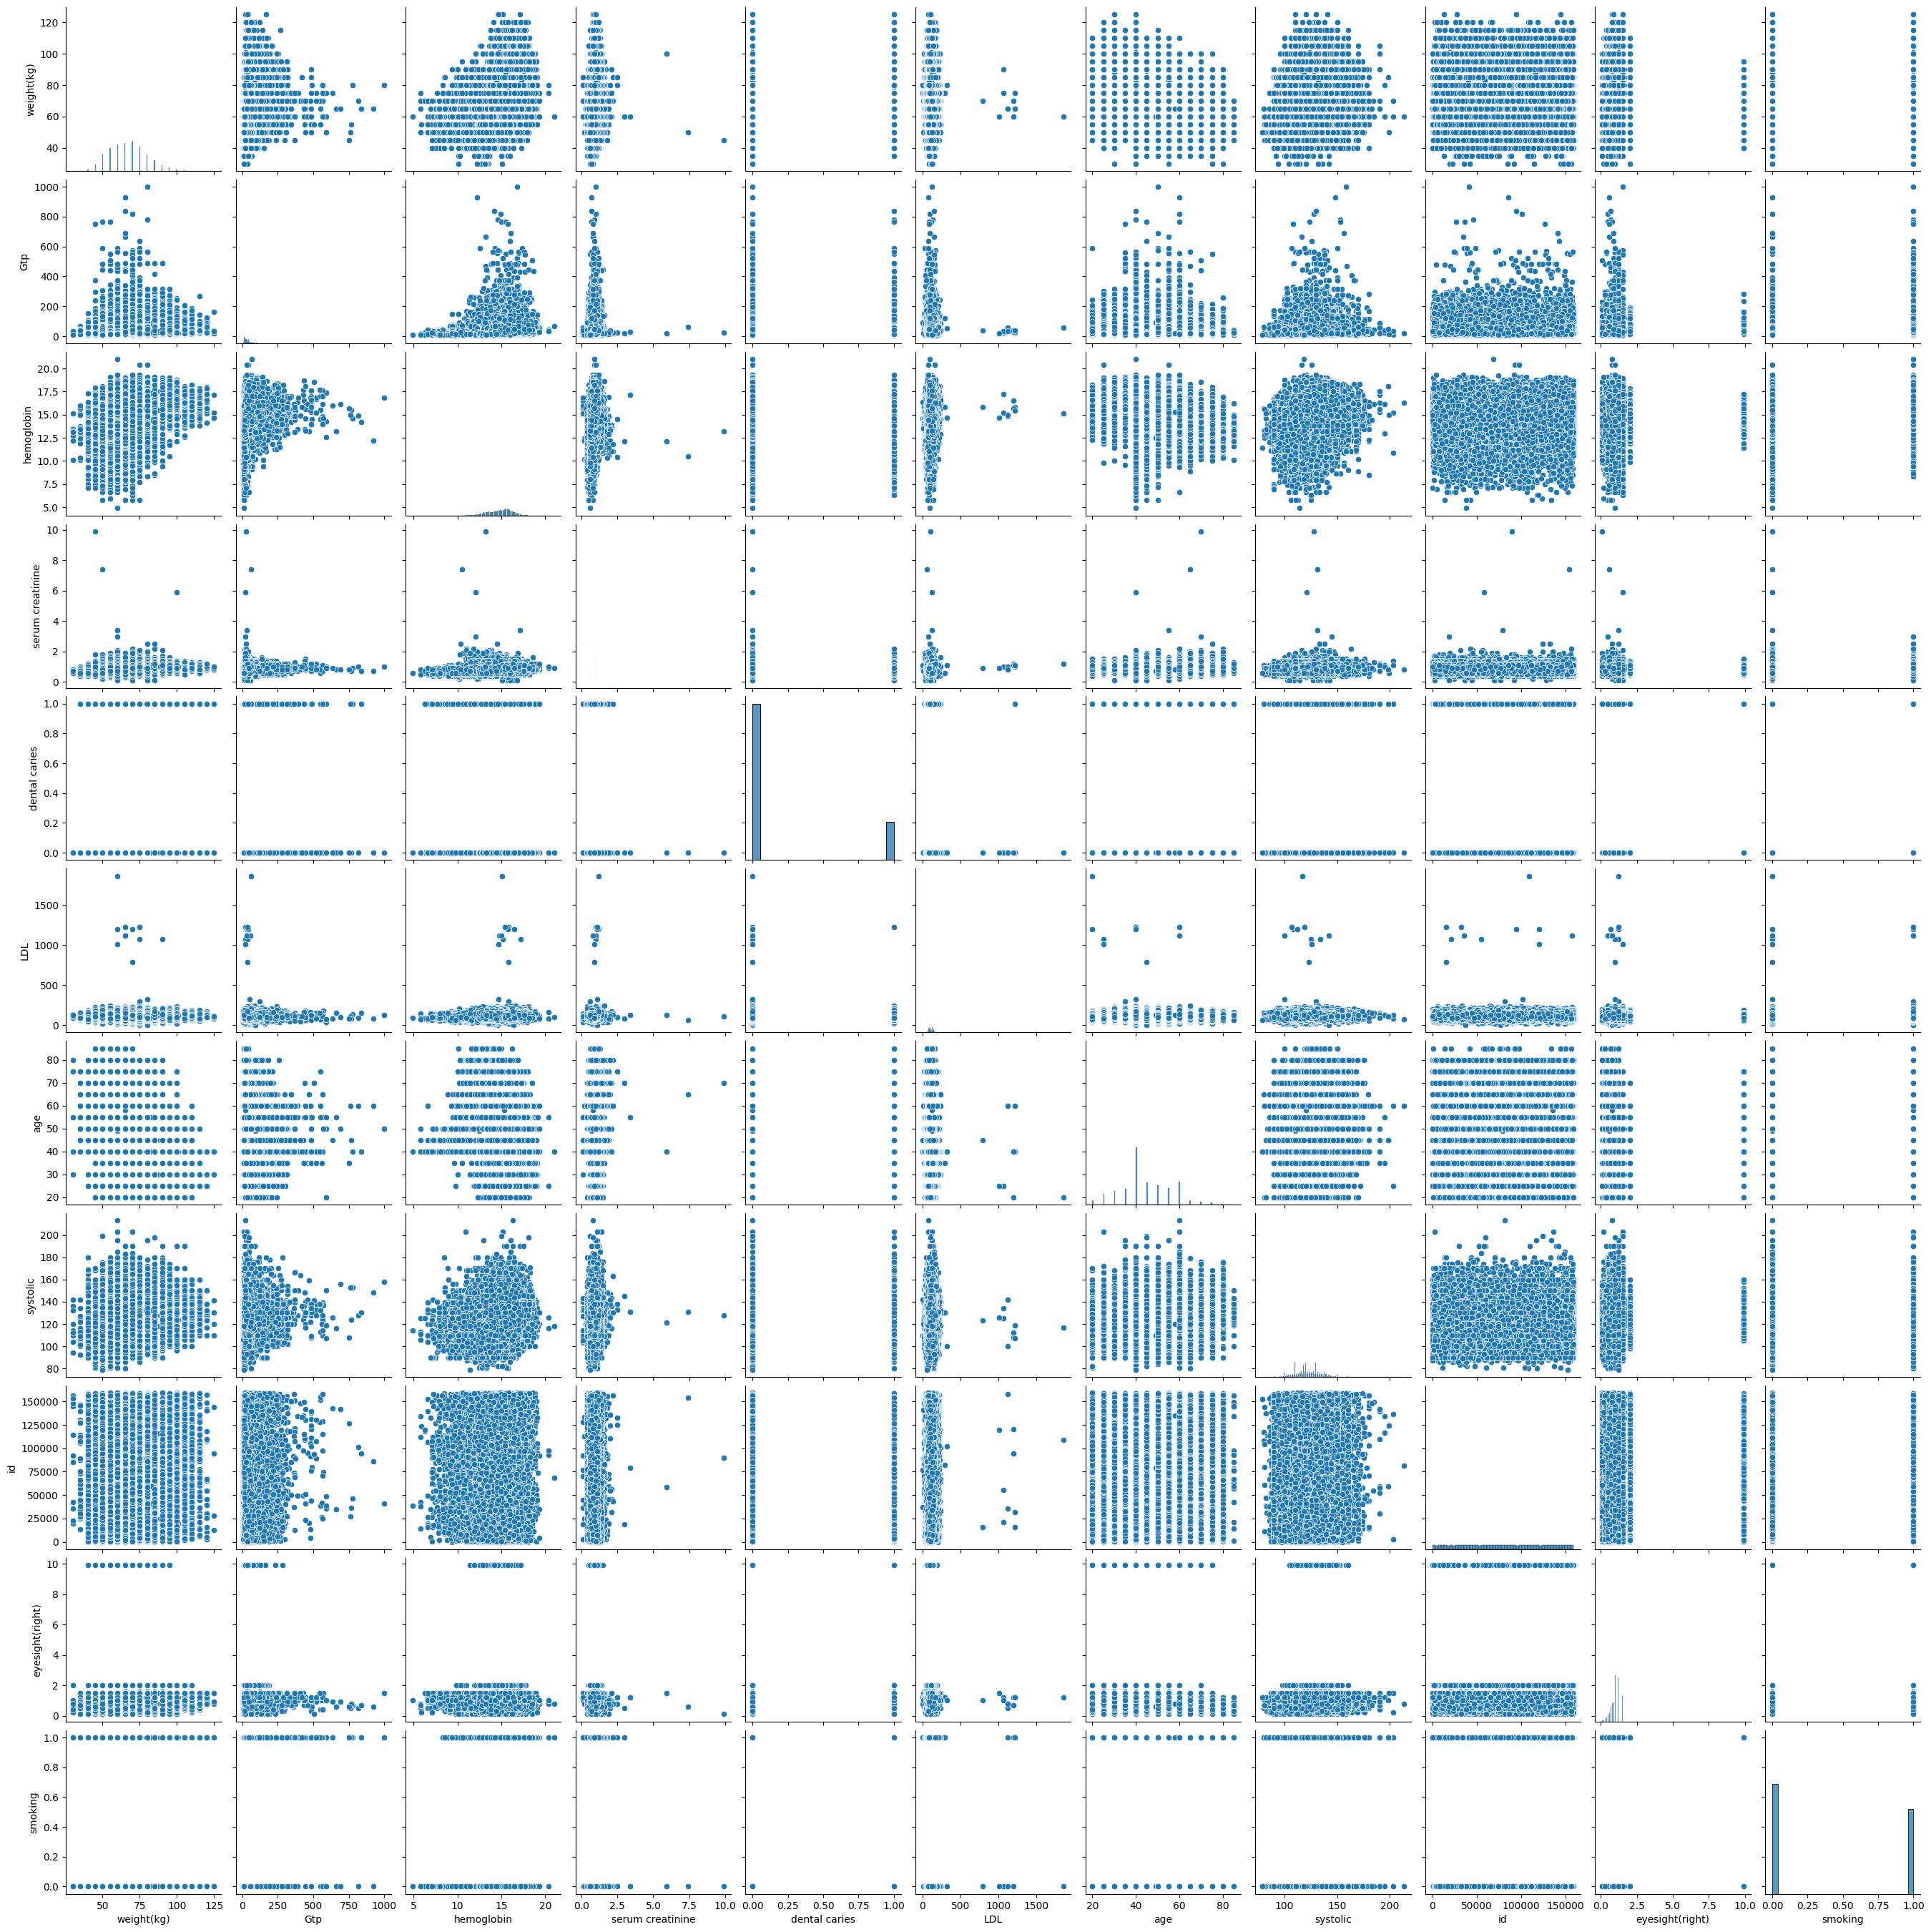

In [ ]:
# Scatter Plot
sns.pairplot(train_df)
plt.show()

averages: 
         weight(kg)        Gtp  hemoglobin  serum creatinine  dental caries  \
smoking                                                                       
0         63.212581  27.851168   14.222529          0.849080       0.160987   
1         72.175555  46.907348   15.529572          0.947726       0.245460   

                LDL        age    systolic            id  eyesight(right)  
smoking                                                                    
0        116.317360  46.435726  121.789869  79651.078274         0.964161  
1        112.359789  41.502540  123.386916  79830.143368         1.050161  


<Axes: xlabel='smoking', ylabel='eyesight(right)'>

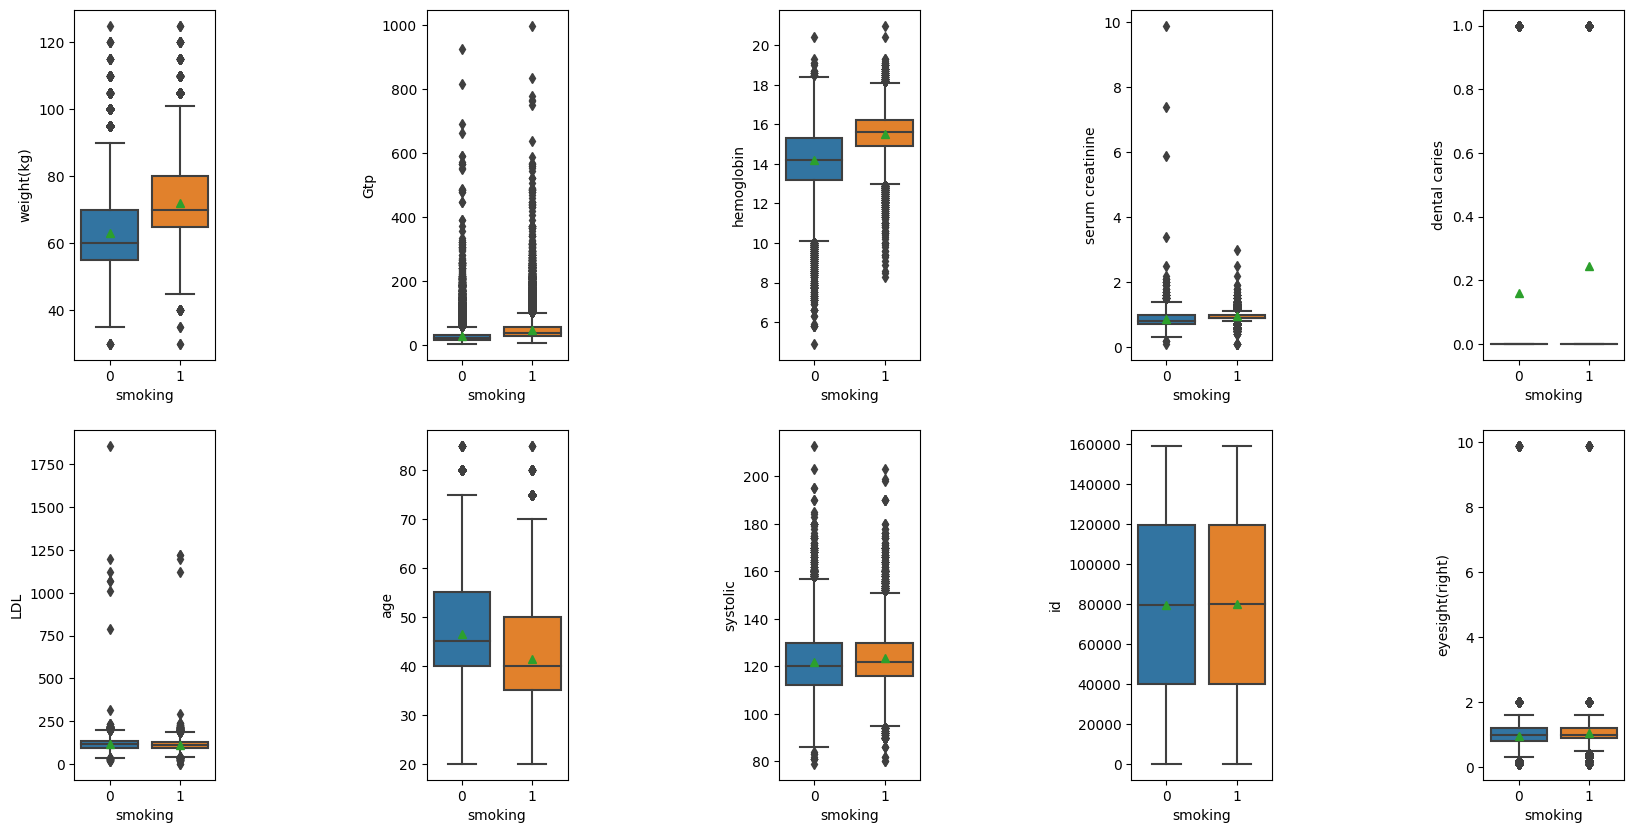

In [ ]:
# Boxplot
train_df_data = train_df[['smoking','weight(kg)',	'Gtp',	'hemoglobin',	'serum creatinine',	'dental caries',	'LDL',	'age',	'systolic',	'id',	'eyesight(right)']].groupby('smoking',as_index=True).mean()
print ('averages: \n'+str(train_df_data.head()))
fig, axs = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None)
sns.boxplot(x="smoking", y="weight(kg)", data=train_df, ax=axs[0][0],showmeans=True)
sns.boxplot(x="smoking", y="Gtp", data=train_df, ax=axs[0][1],showmeans=True)
sns.boxplot(x="smoking", y="hemoglobin", data=train_df, ax=axs[0][2],showmeans=True)
sns.boxplot(x="smoking", y="serum creatinine", data=train_df, ax=axs[0][3],showmeans=True)
sns.boxplot(x="smoking", y="dental caries", data=train_df, ax=axs[0][4],showmeans=True)
sns.boxplot(x="smoking", y="LDL", data=train_df, ax=axs[1][0],showmeans=True)
sns.boxplot(x="smoking", y="age", data=train_df, ax=axs[1][1],showmeans=True)
sns.boxplot(x="smoking", y="systolic", data=train_df, ax=axs[1][2],showmeans=True)
sns.boxplot(x="smoking", y="id", data=train_df, ax=axs[1][3],showmeans=True)
sns.boxplot(x="smoking", y="eyesight(right)", data=train_df, ax=axs[1][4],showmeans=True)

## Multivariate Analysis

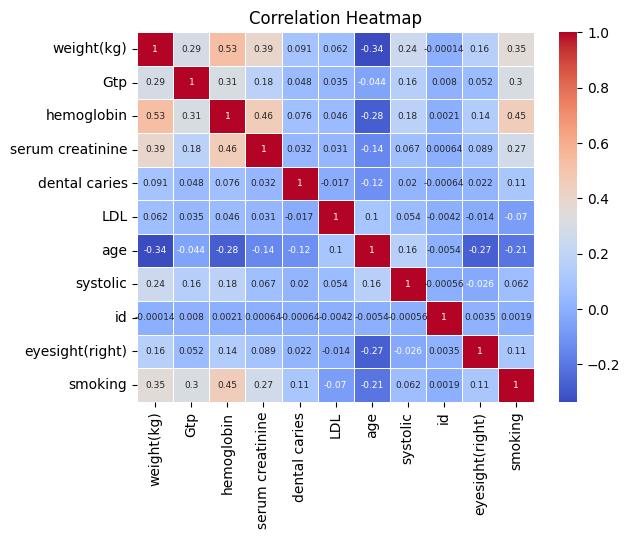

In [ ]:
# Correlation Matrix
corr_matrix = train_df.corr()

sns.heatmap(corr_matrix, annot=True,annot_kws={"size": 6.5},linewidths=.5, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Figure size 600x500 with 0 Axes>

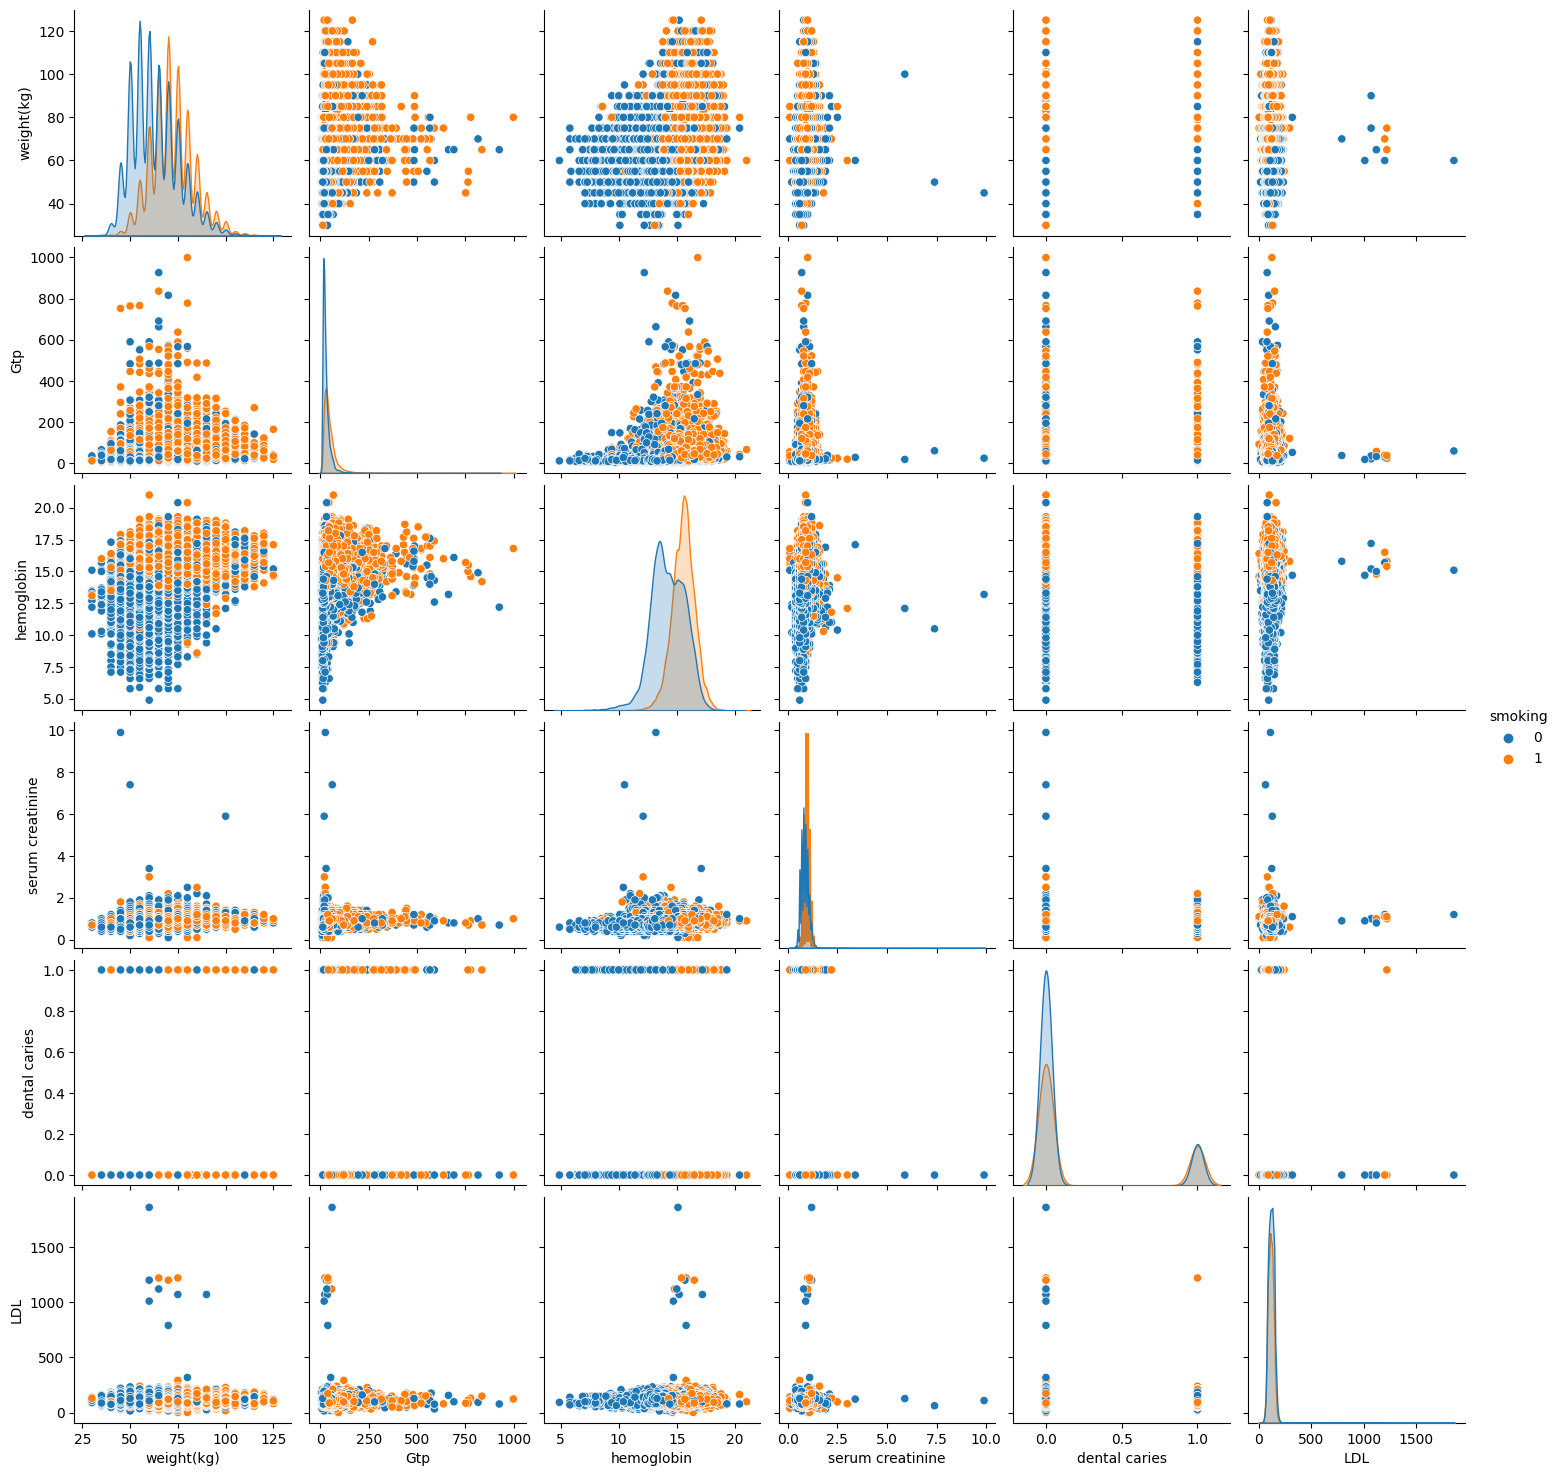

In [ ]:
plt.figure(figsize= (6,5))
sns.pairplot(train_df[['weight(kg)','Gtp','hemoglobin','serum creatinine','dental caries','LDL','smoking']],hue = 'smoking')
plt.show()

<Figure size 500x400 with 0 Axes>

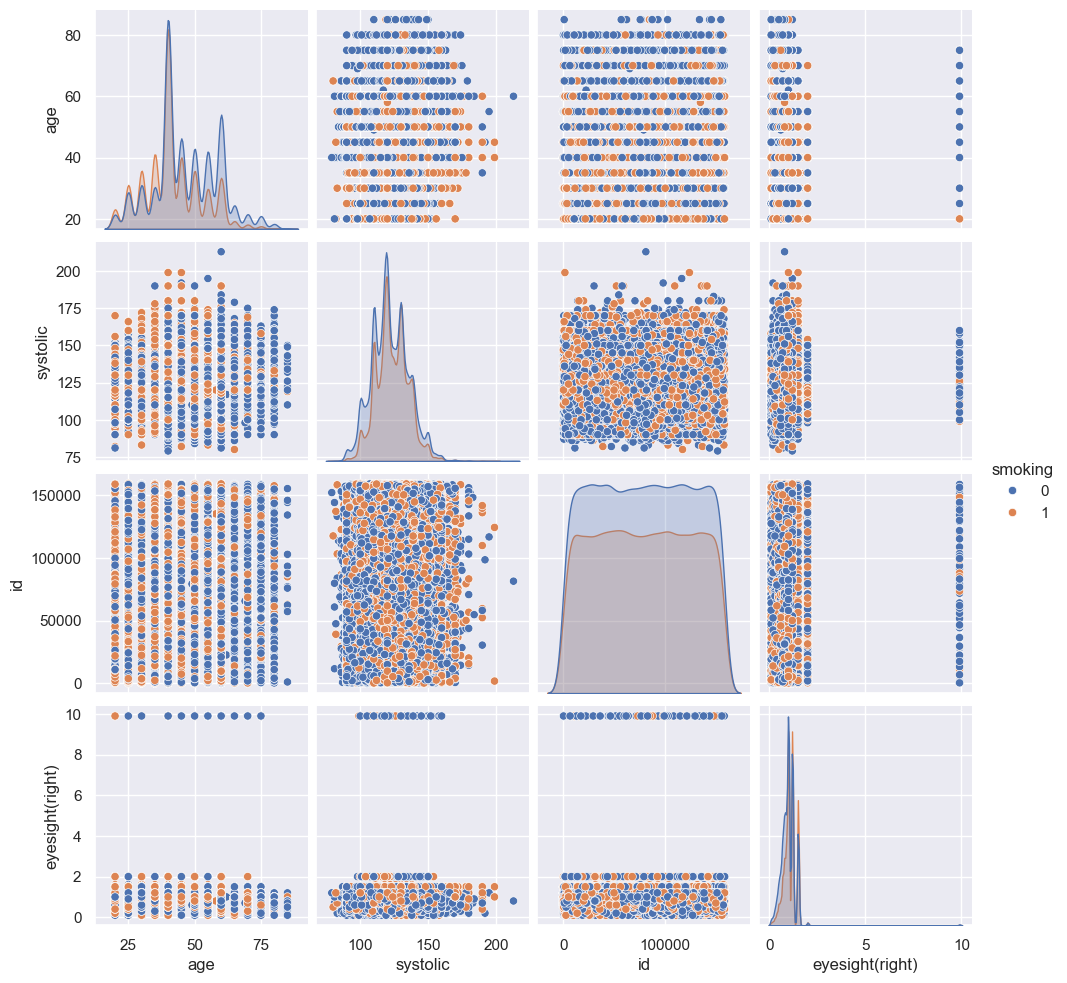

In [ ]:
plt.figure(figsize= (5,4))
sns.pairplot(train_df[['age',	'systolic',	'id',	'eyesight(right)','smoking']],hue = 'smoking')
plt.show()



## Feature Engineering

In [ ]:
# there is a correlation between two features in the heatmap
# create an interaction term between these features
train_df['interaction_featureWH'] = train_df['weight(kg)'] * train_df['hemoglobin']
train_df['interaction_featureSH'] = train_df['serum creatinine'] * train_df['hemoglobin']
train_df['interaction_featureWS'] = train_df['weight(kg)'] * train_df['serum creatinine']
print(train_df.shape)
print(train_df.head())
# Assuming val_df is your validation dataset
val_df['interaction_featureWH'] = val_df['weight(kg)'] * val_df['hemoglobin']
val_df['interaction_featureSH'] = val_df['serum creatinine'] * val_df['hemoglobin']
val_df['interaction_featureWS'] = val_df['weight(kg)'] * val_df['serum creatinine']
# Assuming test_df is your testing dataset
test_df['interaction_featureWH'] = test_df['weight(kg)'] * test_df['hemoglobin']
test_df['interaction_featureSH'] = test_df['serum creatinine'] * test_df['hemoglobin']
test_df['interaction_featureWS'] = test_df['weight(kg)'] * test_df['serum creatinine']


#check the existance of missing values
missing_values = train_df.isnull().sum()

# Display the total number of missing values
total_missing_values = missing_values.sum()
print(f"\nTotal number of missing values: {total_missing_values}\n")

# Scaling Numerical Features
# Standardize numerical features using StandardScaler
numerical_features = ['weight(kg)', 'Gtp', 'hemoglobin', 'serum creatinine', 'dental caries', 'LDL', 'age', 'systolic', 'id', 'eyesight(right)','interaction_featureWH','interaction_featureSH','interaction_featureWS']
scaler = StandardScaler()
train_df[numerical_features]= scaler.fit_transform(train_df[numerical_features])
# Use the same scaler instance to transform the validation data
val_df[numerical_features] = scaler.transform(val_df[numerical_features])
# Use the same scaler instance to transform the testing data
test_df[numerical_features] = scaler.transform(test_df[numerical_features])
train_df.head()

(111479, 14)
        weight(kg)  Gtp  hemoglobin  serum creatinine  dental caries  LDL  \
157749          60   36        16.2               1.0              0   83   
139677          50   12        12.8               0.7              0  134   
66159           65   13        13.3               0.7              0   74   
75435           45   22        13.0               0.8              0  134   
70784           65   13        15.1               1.0              1   93   

        age  systolic      id  eyesight(right)  smoking  \
157749   40       130  157749              1.2        1   
139677   40       116  139677              1.5        0   
66159    70       122   66159              0.7        0   
75435    55       101   75435              1.2        0   
70784    50       113   70784              1.2        1   

        interaction_featureWH  interaction_featureSH  interaction_featureWS  
157749                  972.0                  16.20                   60.0  
139677       

weight(kg)       Gtp  hemoglobin  serum creatinine  dental caries  \
157749   -0.565793 -0.005229    0.981718          0.600036      -0.496609   
139677   -1.360234 -0.776311   -1.389940         -1.068370      -0.496609   
66159    -0.168572 -0.744182   -1.041167         -1.068370      -0.496609   
75435    -1.757455 -0.455027   -1.250431         -0.512235      -0.496609   
70784    -0.168572 -0.744182    0.214417          0.600036       2.013658   

             LDL       age  systolic        id  eyesight(right)  smoking  \
157749 -1.125496 -0.362736  0.590359  1.696904         0.504022        1   
139677  0.691474 -0.362736 -0.509656  1.303844         1.266426        0   
66159  -1.446138  2.177400 -0.038221 -0.295147        -0.766651        0   
75435   0.691474  0.907332 -1.688243 -0.093397         0.504022        0   
70784  -0.769227  0.483976 -0.745373 -0.194555         0.504022        1   

        interaction_featureWH  interaction_featureSH  interaction_featureWS  
157749              -0.122237               0.854581              -0.039814  
139677              -1.455445              -1.290254              -1.336827  
66159               -0.553923              -1.186567              -0.792081  
75435               -1.676308              -0.863657              -1.284947  
70784               -0.084088               0.528708               0.219589

### Handling Outliers

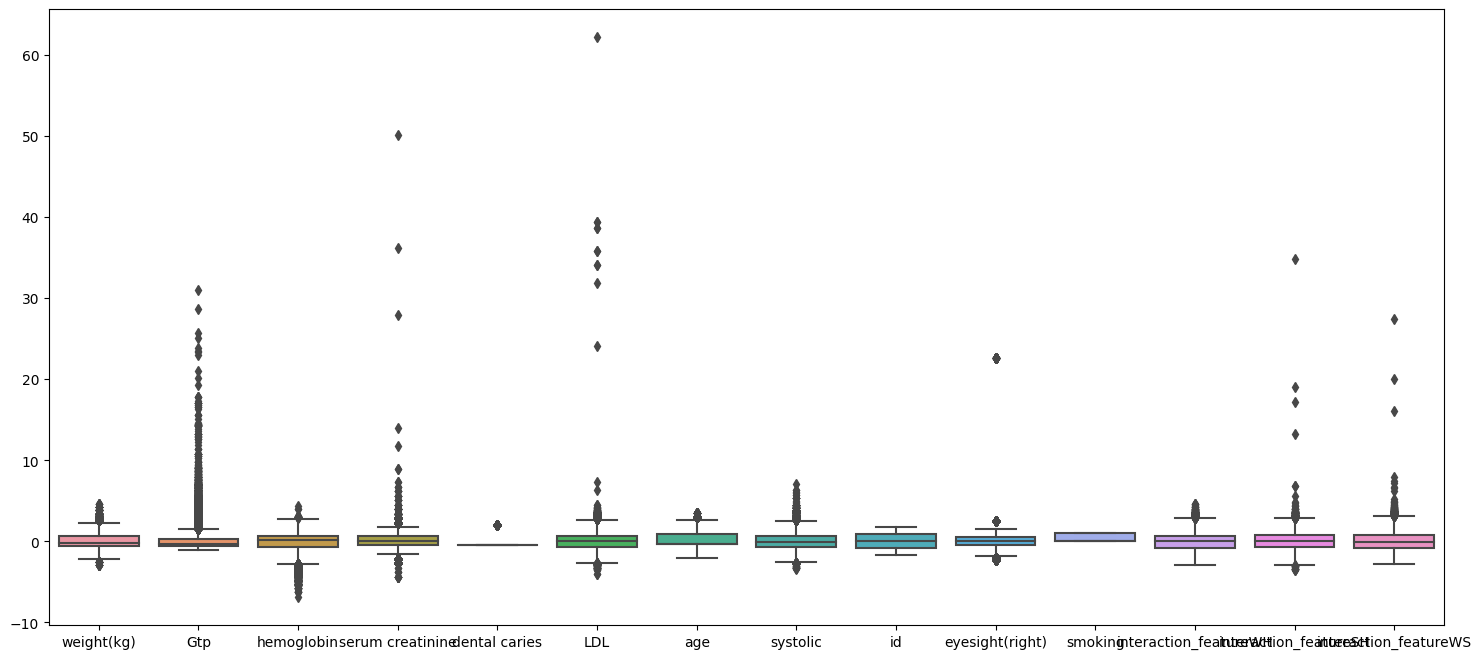

Shape before removing outliers: (111479, 14)
Shape after removing outliers: (106836, 14)


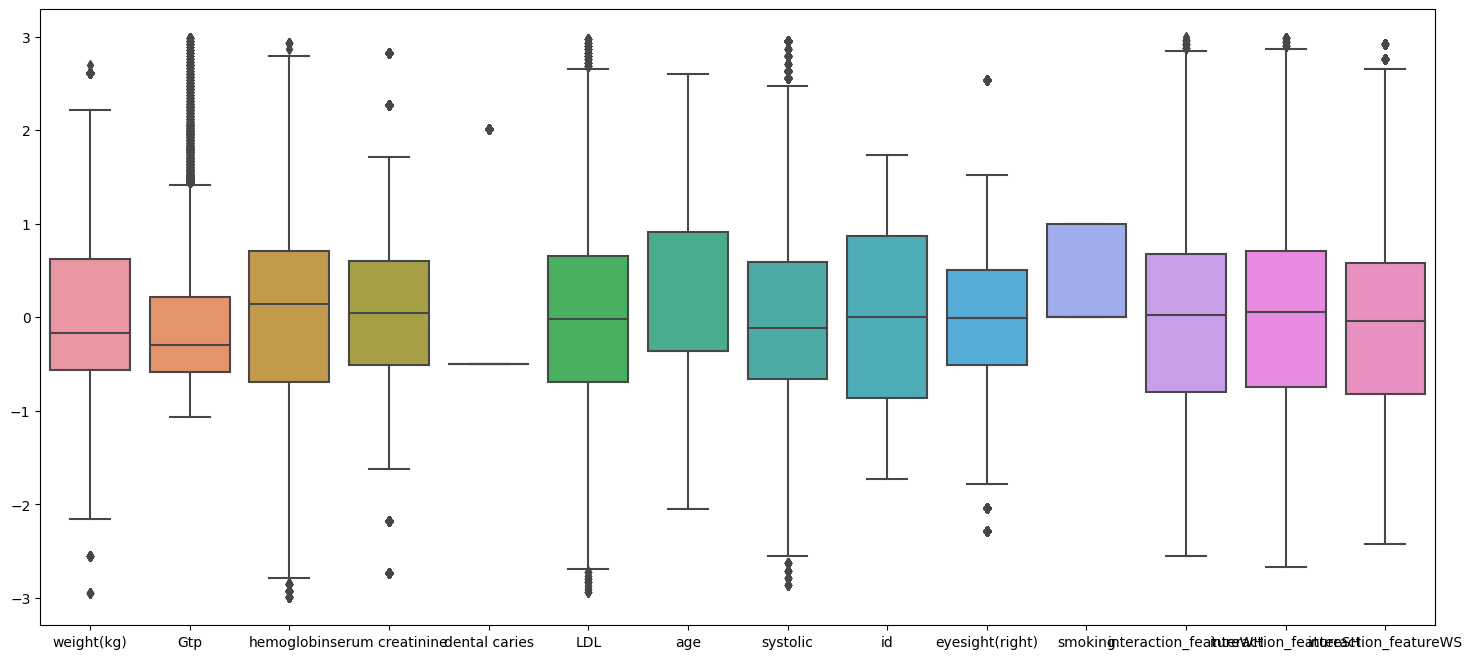

In [ ]:
plt.figure(figsize=(18, 8))
sns.boxplot(train_df)
plt.show()

# Calculate Z-Scores
z_scores = zscore(train_df)

# Identify outliers using a threshold (e.g., 3 standard deviations)
outliers = (z_scores > 3) | (z_scores < -3)

# Replace or remove outliers
df_no_outliers = train_df[~outliers.any(axis=1)]

# Display the shape before and after removing outliers
print(f"Shape before removing outliers: {train_df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

plt.figure(figsize=(18, 8))
sns.boxplot(df_no_outliers)
plt.show()

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train are your training data
n_estimators = 17
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_predictions = np.zeros((X_val.shape[0], n_estimators))

# Initialize an array to store feature importances
feature_importance_accumulated = np.zeros(X_train.shape[1])

for i in range(n_estimators):
    # Create a bootstrap sample
    bootstrap_indices = np.random.choice(X_train.shape[0], size=X_train.shape[0], replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    # Train a base classifier on the bootstrap sample
    base_classifier.fit(X_bootstrap, y_bootstrap)

    # Accumulate feature importances
    feature_importance_accumulated += base_classifier.feature_importances_

    # Make predictions on the validation set
    bagging_predictions[:, i] = base_classifier.predict(X_val)

    # Aggregate predictions using majority voting
    final_predictions = np.round(np.mean(bagging_predictions, axis=1)).astype(int)

    # Evaluate bagging performance
    accuracy = np.mean(final_predictions == y_val)
    print("bagging Accuracy:", accuracy)


bagging Accuracy: 0.556890488948426
bagging Accuracy: 0.556890488948426
bagging Accuracy: 0.556890488948426
bagging Accuracy: 0.556890488948426
bagging Accuracy: 0.556890488948426
bagging Accuracy: 0.556890488948426
bagging Accuracy: 0.556890488948426
bagging Accuracy: 0.556890488948426
bagging Accuracy: 0.580793703951775
bagging Accuracy: 0.6152880107166778
bagging Accuracy: 0.6449263228399196
bagging Accuracy: 0.6738529805760214
bagging Accuracy: 0.6956630944407234
bagging Accuracy: 0.7102729403884795
bagging Accuracy: 0.7229571332886805
bagging Accuracy: 0.7283573342263898
bagging Accuracy: 0.7315388479571333


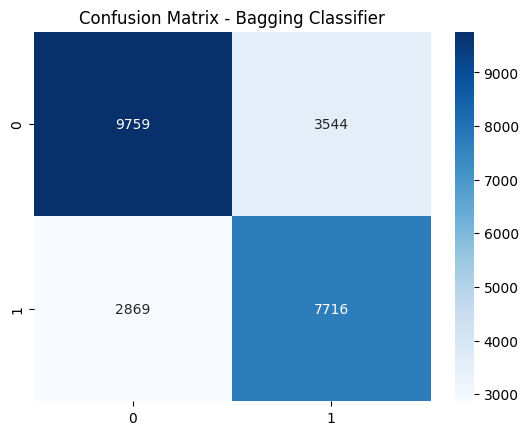

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Bagging Classifier
cm_bagging = confusion_matrix(y_val, final_predictions)
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Bagging Classifier')
plt.show()

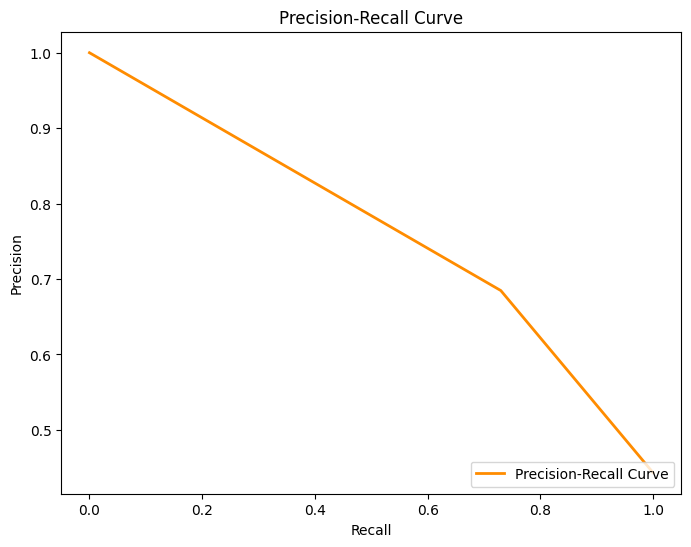

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_val contains the true labels for the validation set
precision, recall, thresholds = precision_recall_curve(y_val, final_predictions)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

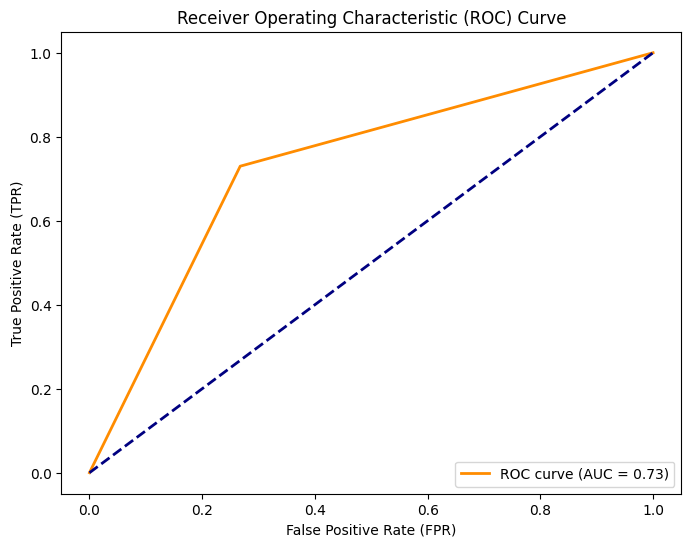

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_val contains the true labels for the validation set
fpr, tpr, thresholds = roc_curve(y_val, final_predictions)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


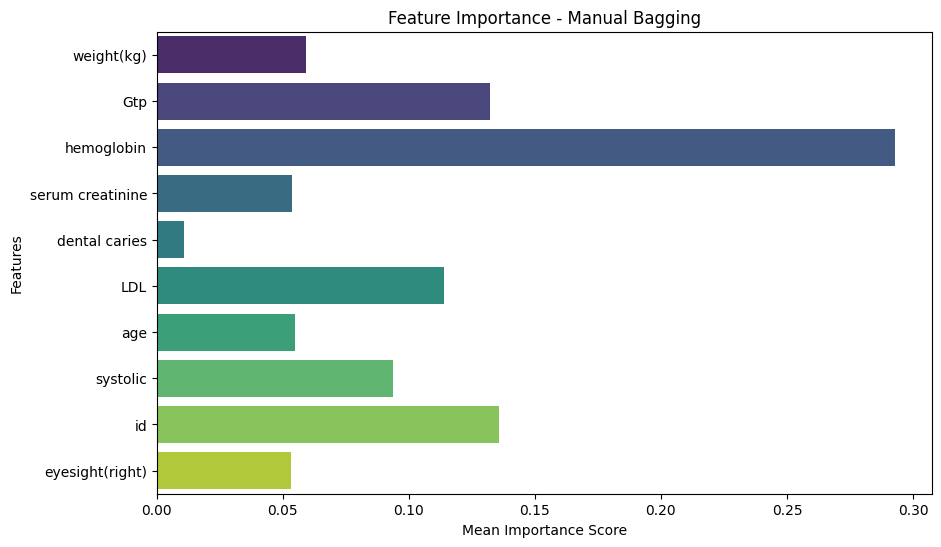

In [ ]:
# Average feature importance across all trees
feature_importance_bagging_manual = feature_importance_accumulated / n_estimators

# Get feature names
feature_names = X_train.columns
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_bagging_manual, y=feature_names, palette='viridis')
plt.title('Feature Importance - Manual Bagging')
plt.xlabel('Mean Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train, X_val, y_val are your training and validation data
n_estimators = 50
base_classifier = DecisionTreeClassifier(max_depth=3)  # Weak classifier (e.g., Decision Stump)

# Initialize instance weights
instance_weights = np.ones(len(X_train)) / len(X_train)

# Initialize classifier weights
classifier_weights = np.zeros(n_estimators)
feature_importance_accumulated = np.zeros(X_train.shape[1])

# Initialize array to store weak classifiers
weak_classifiers = []

for t in range(n_estimators):
    # Train a weak classifier
    classifier_t = base_classifier.fit(X_train, y_train, sample_weight=instance_weights)

    # Make predictions
    predictions_t = classifier_t.predict(X_train)

    # Calculate weighted error
    error_t = np.sum(instance_weights * (predictions_t != y_train))

    # Calculate classifier weight
    alpha_t = 0.5 * np.log((1 - error_t) / max(error_t, 1e-10))  # To avoid division by zero

    # Update instance weights
    instance_weights *= np.exp(-alpha_t * y_train * predictions_t)

    # Normalize instance weights
    instance_weights /= np.sum(instance_weights)

    # Save classifier weight
    classifier_weights[t] = alpha_t

    # Accumulate feature importances
    feature_importance_accumulated += alpha_t * classifier_t.feature_importances_

    # Save weak classifier
    weak_classifiers.append(classifier_t)

# Normalize feature importances after all iterations
feature_importance_normalized = feature_importance_accumulated / np.sum(feature_importance_accumulated)

# Make predictions on the validation set
boosting_predictions = np.zeros(len(X_val))

for t in range(n_estimators):
    boosting_predictions += classifier_weights[t] * weak_classifiers[t].predict(X_val)

# Convert to binary predictions
boosting_predictions = np.sign(boosting_predictions)

# Evaluate performance
accuracy = np.mean(boosting_predictions == y_val)
print("AdaBoost Accuracy:", accuracy)


AdaBoost Accuracy: 0.556890488948426


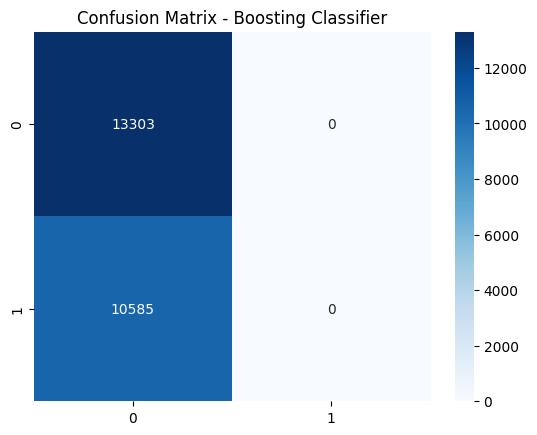

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Bagging Classifier
cm_bagging = confusion_matrix(y_val, boosting_predictions.round())
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Boosting Classifier')
plt.show()

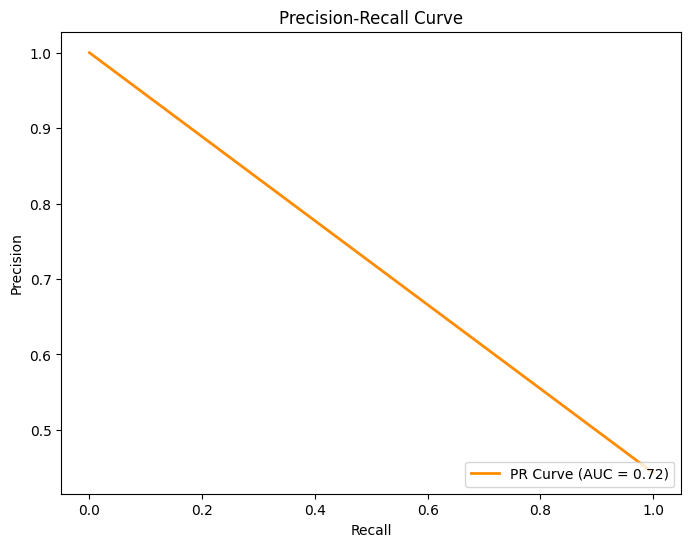

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_val, boosting_predictions)
auc_pr = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

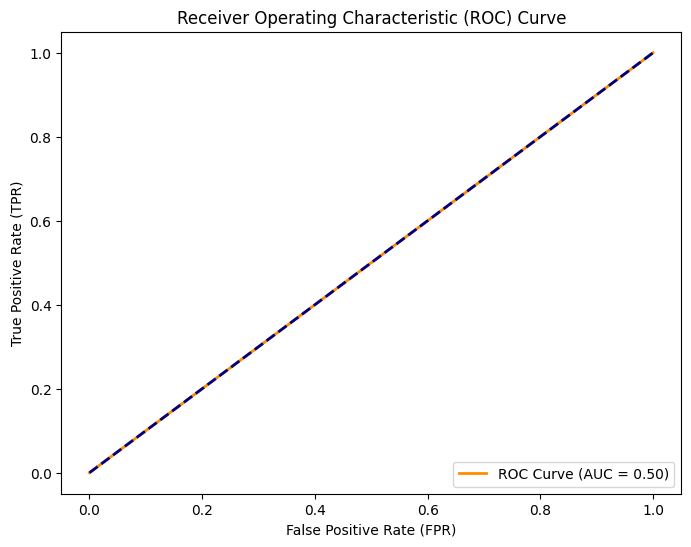

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_val, boosting_predictions)
auc_roc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

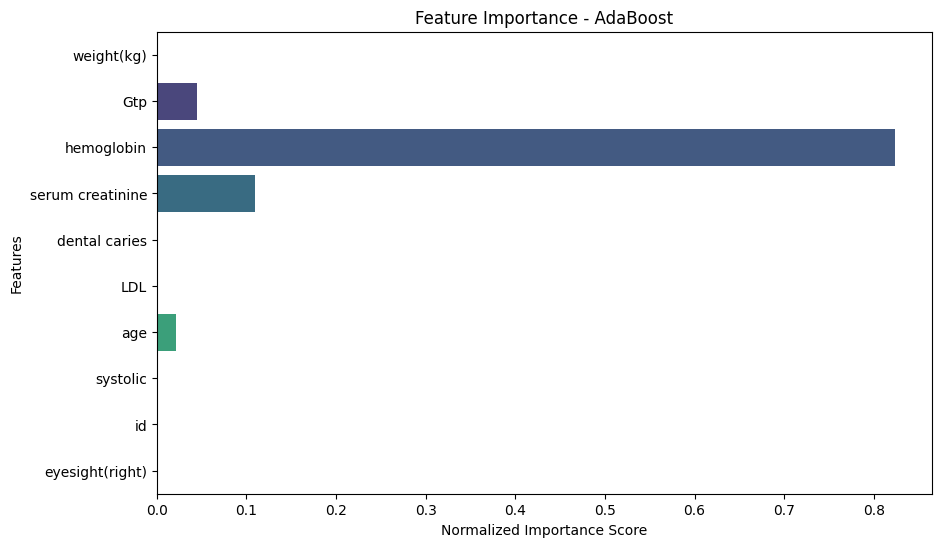

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_normalized, y=X_train.columns, palette='viridis')
plt.title('Feature Importance - AdaBoost')
plt.xlabel('Normalized Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_val, y_val are your training and validation data
n_estimators = 100  # Number of trees in the forest
max_features = "sqrt"  # Number of features to consider at each split (sqrt for random forest)

# Initialize an array to store predictions from each tree
forest_predictions = np.zeros((X_val.shape[0], n_estimators))

# Initialize an array to store feature importances
feature_importance_accumulated = np.zeros(X_train.shape[1])

for i in range(n_estimators):
    # Create a bootstrap sample
    bootstrap_indices = np.random.choice(X_train.shape[0], size=X_train.shape[0], replace=True)
    X_bootstrap = X_train.iloc[bootstrap_indices]
    y_bootstrap = y_train.iloc[bootstrap_indices]

    # Train a decision tree on the bootstrap sample
    decision_tree = DecisionTreeClassifier(max_depth=None, max_features=max_features, random_state=42)
    decision_tree.fit(X_bootstrap, y_bootstrap)

    # Accumulate feature importances
    feature_importance_accumulated += decision_tree.feature_importances_

    # Make predictions on the validation set
    forest_predictions[:, i] = decision_tree.predict(X_val)

# Aggregate predictions using majority voting
forest_final_predictions = np.round(np.mean(forest_predictions, axis=1)).astype(int)

# Evaluate Random Forest performance
accuracy = accuracy_score(y_val, final_predictions)
print("Random Forest Accuracy:", accuracy)



Random Forest Accuracy: 0.7315388479571333


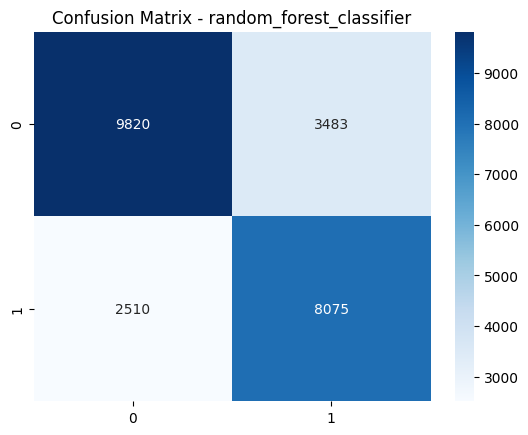

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example for Bagging Classifier
cm_bagging = confusion_matrix(y_val, forest_final_predictions)
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - random_forest_classifier')
plt.show()

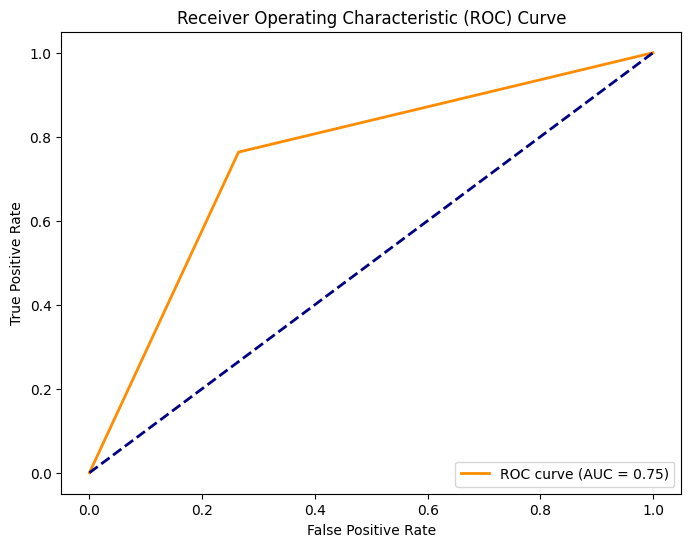

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, forest_final_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


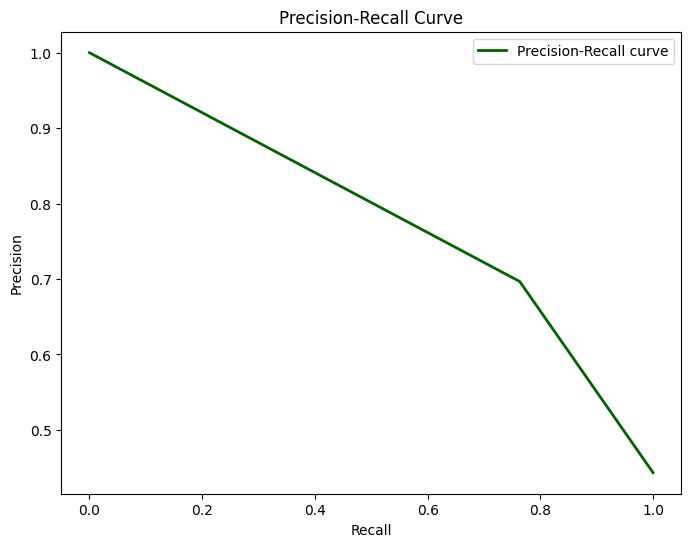

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_val, forest_final_predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkgreen', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()



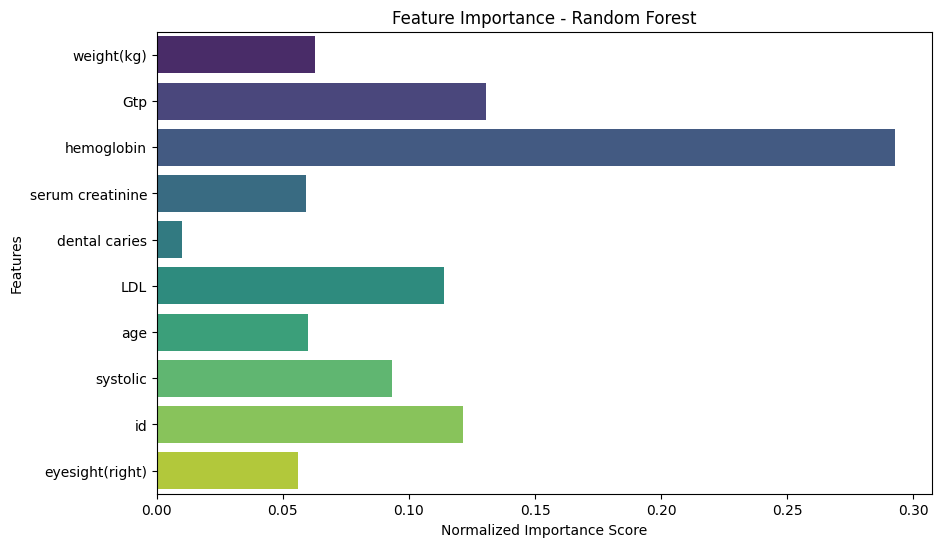

In [ ]:
# Normalize feature importances
feature_importance_normalized = feature_importance_accumulated / np.sum(feature_importance_accumulated)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_normalized, y=X_train.columns, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Normalized Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train are your training data

# Define the base classifier
base_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'base_estimator__max_depth': [1, 2, 3]
}

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Perform grid search
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params_grid = grid_search.best_params_
print("Best Hyperparameters from Grid Search:", best_params_grid)


KeyboardInterrupt: ignored

In [ ]:
# Define the parameter distributions for randomized search
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'base_estimator__max_depth': [1, 2, 3]
}

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

# Perform randomized search
randomized_search = RandomizedSearchCV(adaboost_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
randomized_search.fit(X_train, y_train)

# Get the best hyperparameters from randomized search
best_params_randomized = randomized_search.best_params_
print("Best Hyperparameters from Randomized Search:", best_params_randomized)

Best Hyperparameters from Randomized Search: {'n_estimators': 150, 'learning_rate': 0.2, 'base_estimator__max_depth': 2}


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train are your training data

# Define the base classifier
base_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

# Initialize the bagging classifier
bagging_classifier = BaggingClassifier(base_classifier, random_state=42)

# Perform grid search
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from grid search
best_params_grid = grid_search.best_params_
print("Best Hyperparameters from Grid Search:", best_params_grid)

# Define the parameter distributions for randomized search
param_dist = param_grid

# Initialize the bagging classifier
bagging_classifier =BaggingClassifier(base_classifier, random_state=42)

# Perform randomized search
randomized_search = RandomizedSearchCV(bagging_classifier, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
randomized_search.fit(X_train, y_train)

# Get the best hyperparameters from randomized search
best_params_randomized = randomized_search.best_params_
print("Best Hyperparameters from Randomized Search:", best_params_randomized)

Best Hyperparameters from Grid Search: {'base_estimator__max_depth': 5, 'max_samples': 0.05}
Best Hyperparameters from Randomized Search: {'max_samples': 0.05, 'base_estimator__max_depth': 5}


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are your training data

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
}

# Initialize the RandomForest classifier
randomForest_classifier = RandomForestClassifier(random_state=42)

#Perform grid search
grid_search = GridSearchCV(randomForest_classifier, param_grid, cv=5, scoring='accuracy')  # Specify a scoring metric
grid_search.fit(X_train, y_train)

#Get the best hyperparameters from grid search
best_params_grid = grid_search.best_params_
print("Best Hyperparameters from Grid Search:", best_params_grid)



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are your training data

# Define parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
}

# Initialize the RandomForest classifier
randomForest_classifier = RandomForestClassifier(random_state=42)

# Define parameter distributions for randomized search
param_dist = param_grid  # Reuse the same grid for consistency

# Perform randomized search
randomized_search = RandomizedSearchCV(randomForest_classifier, param_distributions=param_dist, n_iter=5, cv=5, random_state=42)
randomized_search.fit(X_train, y_train)

# Get the best hyperparameters from randomized search
best_params_randomized = randomized_search.best_params_
print("Best Hyperparameters from Randomized Search:", best_params_randomized)

Best Hyperparameters from Randomized Search: {'n_estimators': 200, 'max_depth': 15}


In [ ]:
# Gradient Boosting
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
}

base_models = [
    RandomForestClassifier(random_state=42),  # Adjust hyperparameters as needed
    XGBClassifier(random_state=42),  # Use the best model from hyperparameter tuning
    SVC(random_state=42)  # Adjust kernel and other parameters as needed
]

randomized_search = RandomizedSearchCV(XGBClassifier(), param_distributions=param_grid, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
best_model = randomized_search.fit(X_train, y_train)

print(randomized_search.best_params_)

{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0}


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
meta_model = LogisticRegression()

meta_model.fit(base_model_predictions, y_train)

from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = meta_model.predict(base_model_predictions)
print("Accuracy:", accuracy_score(y_train, y_pred))
print("ROC AUC:", roc_auc_score(y_train, y_pred))